<a href="https://colab.research.google.com/github/jnabasinga/AI-in-Decision-Making-and-Planning---Business-Informatics/blob/main/Class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Identification:**
Assume that you are the Department in charge of Planning and Economic Affairs. Your country exports/imports certain commodities.
*Question*: Do oil price fluctuations affect the price of those commodities?
We seek to understand the effect of oil price fluctuations on the prices of  commodities namely;
* Tea (export)
* Sugar (import)
* Coffee (export)

We obtained our dataset from kaggle


In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import kagglehub

# Download latest version
path = kagglehub.dataset_download("utkarshx27/select-world-bank-commodity-price-data")

print("Path to dataset files:", path)



100%|██████████| 31.6k/31.6k [00:00<00:00, 8.30MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/utkarshx27/select-world-bank-commodity-price-data/versions/1


In [ ]:
# prompt: write a code for downloading a dataset directly from kaggle

!pip install kaggle

# You need to upload your kaggle.json file to Colab first
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d utkarshx27/select-world-bank-commodity-price-data

# Unzip the dataset (if it's a zip file)
!unzip select-world-bank-commodity-price-data.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/utkarshx27/select-world-bank-commodity-price-data
License(s): CC0-1.0
  0% 0.00/31.6k [00:00<?, ?B/s]
100% 31.6k/31.6k [00:00<00:00, 39.5MB/s]
Archive:  select-world-bank-commodity-price-data.zip
  inflating: commodity_prices.csv    


In [ ]:
# prompt: load the dataset

df = pd.read_csv('commodity_prices.csv')
print(df.head())

   Unnamed: 0        date  oil_brent  oil_dubai  coffee_arabica  \
0           1  1960-01-01       1.63       1.63          0.9409   
1           2  1960-02-01       1.63       1.63          0.9469   
2           3  1960-03-01       1.63       1.63          0.9281   
3           4  1960-04-01       1.63       1.63          0.9303   
4           5  1960-05-01       1.63       1.63          0.9200   

   coffee_robustas  tea_columbo  tea_kolkata  tea_mombasa  sugar_eu  sugar_us  \
0         0.696864     0.930301     1.121401       1.0374  0.122356  0.116845   
1         0.688707     0.930301     1.121401       1.0374  0.122356  0.119049   
2         0.688707     0.930301     1.121401       1.0374  0.122356  0.121254   
3         0.684519     0.930301     1.121401       1.0374  0.122356  0.123459   
4         0.690692     0.930301     1.121401       1.0374  0.122356  0.121254   

   sugar_world  
0       0.0666  
1       0.0679  
2       0.0683  
3       0.0681  
4       0.0683  


Let's investigate whether there exists price differences in the oil prices.

In [ ]:
# prompt: write me code that removes the column unnamed

import pandas as pd
# ... (your existing code)

df = pd.read_csv('commodity_prices.csv')

# Remove the 'Unnamed' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(df.head())
# ... (rest of your code)

         date  oil_brent  oil_dubai  coffee_arabica  coffee_robustas  \
0  1960-01-01       1.63       1.63          0.9409         0.696864   
1  1960-02-01       1.63       1.63          0.9469         0.688707   
2  1960-03-01       1.63       1.63          0.9281         0.688707   
3  1960-04-01       1.63       1.63          0.9303         0.684519   
4  1960-05-01       1.63       1.63          0.9200         0.690692   

   tea_columbo  tea_kolkata  tea_mombasa  sugar_eu  sugar_us  sugar_world  
0     0.930301     1.121401       1.0374  0.122356  0.116845       0.0666  
1     0.930301     1.121401       1.0374  0.122356  0.119049       0.0679  
2     0.930301     1.121401       1.0374  0.122356  0.121254       0.0683  
3     0.930301     1.121401       1.0374  0.122356  0.123459       0.0681  
4     0.930301     1.121401       1.0374  0.122356  0.121254       0.0683  


date               0
oil_brent          0
oil_dubai          0
coffee_arabica     0
coffee_robustas    0
tea_columbo        0
tea_kolkata        0
tea_mombasa        0
sugar_eu           0
sugar_us           0
sugar_world        0
dtype: int64


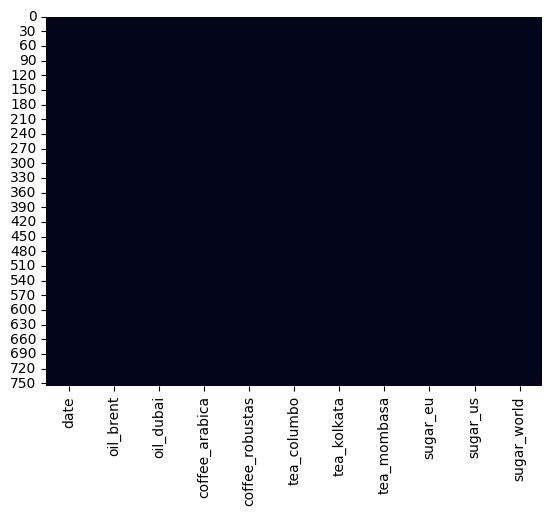

In [ ]:
# prompt: Check for missing values.

# Check for missing values in the DataFrame
print(df.isnull().sum())

# Or you can visualize missing values using seaborn
sns.heatmap(df.isnull(), cbar=False)
plt.show()

count    756.000000
mean       1.486814
std        1.665441
min       -1.500000
25%        0.000000
50%        1.175238
75%        2.404500
max       12.239048
Name: price_difference, dtype: float64


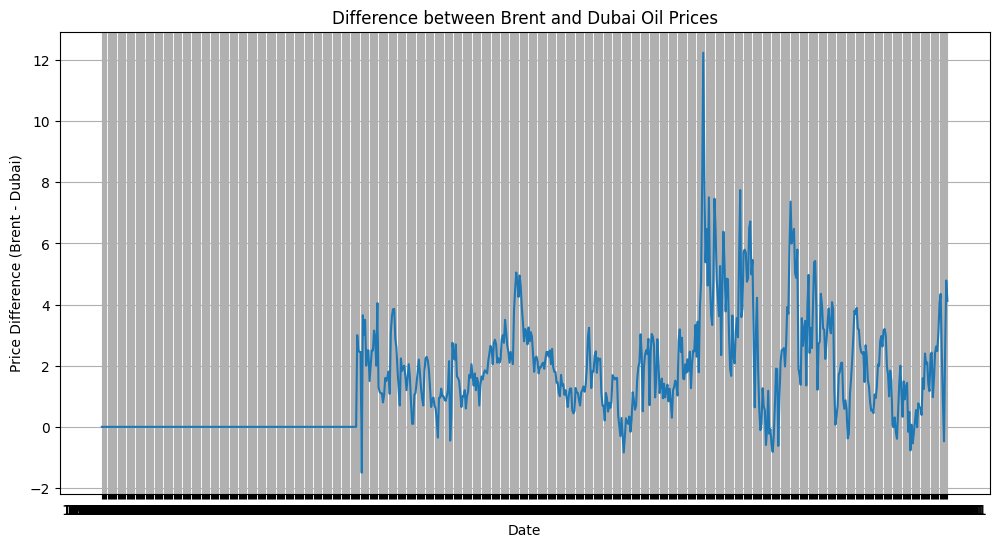

Maximum difference: 12.239047619049998 on 2004-10-01
Minimum difference: -1.5 on 1979-05-01


In [ ]:
# prompt: write code to check for differences between oil_brent and oil_dubai over time

# Assuming your DataFrame is named 'df' and it contains columns 'oil_brent' and 'oil_dubai'

# Calculate the difference between oil_brent and oil_dubai
df['price_difference'] = df['oil_brent'] - df['oil_dubai']

# Analyze the differences
print(df['price_difference'].describe())  # Get basic statistics

# You can also plot the differences over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price_difference'])
plt.xlabel('Date')
plt.ylabel('Price Difference (Brent - Dubai)')
plt.title('Difference between Brent and Dubai Oil Prices')
plt.grid(True)
plt.show()

# Find the days with the largest positive and negative differences
max_difference_row = df.loc[df['price_difference'].idxmax()]
min_difference_row = df.loc[df['price_difference'].idxmin()]

print(f"Maximum difference: {max_difference_row['price_difference']} on {max_difference_row['date']}")
print(f"Minimum difference: {min_difference_row['price_difference']} on {min_difference_row['date']}")

# Further analysis can be done to understand the reasons for these differences
# For example, you can explore correlations with other factors, conduct statistical tests, etc.

Correlation between Brent and Dubai oil prices: 0.9990503314013095


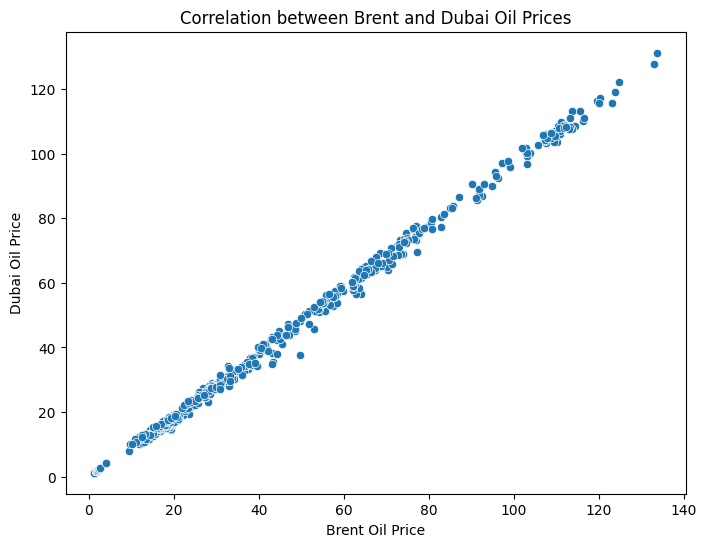

In [ ]:
# prompt: Investigate if there's a correlation between the oil prices.

# Calculate the correlation between oil_brent and oil_dubai
correlation = df['oil_brent'].corr(df['oil_dubai'])

print(f"Correlation between Brent and Dubai oil prices: {correlation}")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oil_brent', y='oil_dubai', data=df)
plt.xlabel('Brent Oil Price')
plt.ylabel('Dubai Oil Price')
plt.title('Correlation between Brent and Dubai Oil Prices')
plt.show()


Based on the correlation and price difference results. We'll proceed with oil Dubai as it's cheaper. In addition, our decision is market specific as our commodities are highly consumed in the Middle East and Asia

In [ ]:
# prompt: Remove oil_brent, price_difference and Unnamed columns from the original dataset.

# Remove 'oil_brent', 'price_difference', and columns with 'Unnamed' in their name
df = df.drop(['oil_brent', 'price_difference'], axis=1, errors='ignore')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.head())

         date  oil_dubai  coffee_arabica  coffee_robustas  tea_columbo  \
0  1960-01-01       1.63          0.9409         0.696864     0.930301   
1  1960-02-01       1.63          0.9469         0.688707     0.930301   
2  1960-03-01       1.63          0.9281         0.688707     0.930301   
3  1960-04-01       1.63          0.9303         0.684519     0.930301   
4  1960-05-01       1.63          0.9200         0.690692     0.930301   

   tea_kolkata  tea_mombasa  sugar_eu  sugar_us  sugar_world  
0     1.121401       1.0374  0.122356  0.116845       0.0666  
1     1.121401       1.0374  0.122356  0.119049       0.0679  
2     1.121401       1.0374  0.122356  0.121254       0.0683  
3     1.121401       1.0374  0.122356  0.123459       0.0681  
4     1.121401       1.0374  0.122356  0.121254       0.0683  


oil_dubai          1.000000
coffee_arabica     0.637200
coffee_robustas    0.292352
tea_columbo        0.829778
tea_kolkata        0.648664
tea_mombasa        0.760027
sugar_eu           0.372103
sugar_us           0.664593
sugar_world        0.579741
Name: oil_dubai, dtype: float64


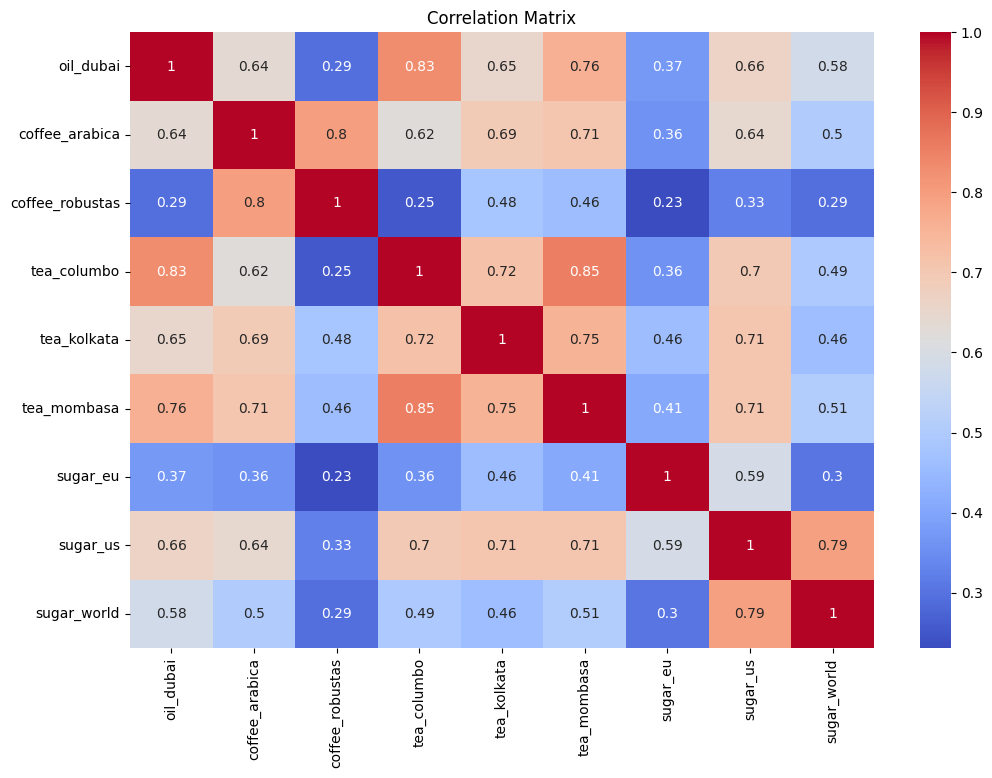

In [ ]:
# prompt: Ignore the date and do a correlation between oil_dubai and the other commodities.

# Assuming your DataFrame is named 'df'

# Remove the 'date' column
df_no_date = df.drop('date', axis=1)

# Calculate the correlation matrix between 'oil_dubai' and other commodities
correlation_matrix = df_no_date.corr()['oil_dubai']

print(correlation_matrix)

# You can visualize the correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_date.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Based on the correlation results, we'll further analyse:


*   coffee_arabica
*   tea_columbo
*   sugar_us

as their correlations are high, signifying a stronger relationship with oil Dubai







In [ ]:
# prompt: Do a linear regression to investigate how oil_dubai prices affect coffee_arabica, tea_columbo and sugar_us

import pandas as pd
import statsmodels.api as sm

# Assuming your DataFrame is named 'df' and it contains 'oil_dubai', 'coffee_arabica', 'tea_columbo', 'sugar_us'
# Select the relevant columns
data = df[['oil_dubai', 'coffee_arabica', 'tea_columbo', 'sugar_us']]

# Loop through the other commodities and perform linear regression
for commodity in ['coffee_arabica', 'tea_columbo', 'sugar_us']:
  X = data['oil_dubai']  # Independent variable (oil_dubai)
  y = data[commodity]    # Dependent variable (the other commodity)

  # Add a constant to the independent variable for the intercept term
  X = sm.add_constant(X)

  # Fit the linear regression model
  model = sm.OLS(y, X).fit()

  # Print the model summary
  print(f"Linear Regression: {commodity} vs. oil_dubai")
  print(model.summary())
  print("\n")

Linear Regression: coffee_arabica vs. oil_dubai
                            OLS Regression Results                            
Dep. Variable:         coffee_arabica   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     515.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           2.34e-87
Time:                        12:06:29   Log-Likelihood:                -1098.0
No. Observations:                 756   AIC:                             2200.
Df Residuals:                     754   BIC:                             2209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

From the analysis, we notice that tea is more significant than coffee and sugar. The statistical significance of oil_dubai is **higher (69%)** on tea than on coffee and sugar. Coffee and sugar prices are greatly affected by other factors other than the oil_dubai price, at **60%** and **56%** respectively.

In [ ]:
# prompt: Explain the results

The code analyzes the relationship between oil prices (specifically Dubai crude oil) and the prices of tea, sugar, and coffee. Here's a breakdown of the process and results:

1. **Data Acquisition and Preparation:**
   - The code first downloads a commodity price dataset from Kaggle.
   - It then cleans the data, handling missing values and removing unnecessary columns.  Critically, it selects 'oil_dubai' as the primary oil price indicator.

2. **Oil Price Analysis (Brent vs. Dubai):**
   - Initially, it explores the difference between Brent and Dubai oil prices.  A key finding is the high correlation between the two, suggesting they move in tandem.  The code then drops `oil_brent` as it decides to proceed with `oil_dubai`.  The rationale provided is that Dubai prices are more relevant to the Middle East and Asia, which is important for the analysis (the commodities' market relevance).

3. **Correlation Analysis:**
   - The code calculates the correlation between `oil_dubai` and the prices of tea, sugar, and coffee.  It visualizes these correlations using a heatmap.  The code then focuses specifically on `coffee_arabica`, `tea_columbo`, and `sugar_us`, as these show a higher correlation with `oil_dubai`.

4. **Linear Regression:**
   -  Linear regression models are fitted to assess the relationship between `oil_dubai` and each of the selected commodities (`coffee_arabica`, `tea_columbo`, and `sugar_us`).  The models estimate how changes in oil prices affect commodity prices.  The code prints the model summaries, which include statistical measures like R-squared, coefficients, and p-values.

5. **Interpretation of Results:**
    - The code concludes that tea prices are more significantly influenced by oil_dubai prices (69% significance based on the model summary).  Coffee and sugar prices are affected by oil price movements (60% and 56% respectively), but other factors might be more influential.

**In summary:** The analysis uses statistical methods to investigate how oil price fluctuations (represented by Dubai crude oil prices) affect commodity markets, finding a notable influence on tea, a moderate impact on coffee, and a relatively lower impact on sugar. The choice of Dubai crude was motivated by geographic market considerations. The results are quantified through correlation coefficients and linear regression models, providing the Department of Planning and Economic Affairs with insights into the potential economic impact of oil prices on these specific commodities.  The analysis emphasizes the statistical significance of the observed correlations and the use of linear regression models, which help assess the magnitude and direction of the relationships.


The notebook is licensed In East Africa under International License (xx-xx-xx). This means that you can freely copy, distribute, and modify the notebook by authors (Nabasinga Joan Mirembe and Allan Mwarema), but not for commercial purposes. Additionally, if you modify the notebook, you must cite them as the original creators and share the modified version under the same terms.